### Core 5
## Cluster: Algoritmo K-means (Core)

### Descripción:
El algoritmo K-means es uno de los métodos de agrupamiento más utilizados en análisis de datos y machine learning. Este algoritmo busca agrupar un conjunto de datos en K grupos o clusters, donde cada grupo está definido por un centroide. En esta actividad, utilizaremos el algoritmo K-means para analizar y segmentar clientes en función de su comportamiento de compra, utilizando el dataset «Mall Customer Segmentation Data» de Kaggle.

Enlace al dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

### Expansión del Algoritmo y Aplicaciones
El algoritmo K-means tiene una amplia gama de aplicaciones en diversas industrias. Algunos ejemplos incluyen:
* Segmentación de Clientes: Agrupar a los clientes según su comportamiento de compra o interacción con un producto.
* Compresión de Imágenes: Reducir el número de colores en una imagen agrupando píxeles similares.
* Agrupación de Documentos: Clasificar documentos en función de su similitud textual.

En esta actividad, el enfoque está en la segmentación de clientes para un centro comercial, pero el mismo algoritmo puede aplicarse a otros dominios como la biología, el procesamiento de señales y la detección de anomalías.

### Objetivo de la Actividad
El objetivo de esta actividad es utilizar el algoritmo K-means para identificar diferentes grupos de clientes según su comportamiento de compra. El análisis de los clusters resultantes permitirá obtener una mejor comprensión de las características de los clientes, lo que puede ser útil para personalizar estrategias de marketing y mejorar la experiencia del cliente.

### Descripción del Algoritmo K-means
K-means es un algoritmo de aprendizaje no supervisado que agrupa datos en K clusters o grupos, donde K es un número predefinido. Cada cluster se representa mediante un centroide, que es el promedio de todos los puntos de datos en ese grupo. El algoritmo tiene dos fases principales:
1. Asignación de clusters: Cada punto de datos se asigna al centroide más cercano.
2. Actualización de centroides: Se recalcula la posición de los centroides basándose en la media de los puntos de datos asignados a cada cluster.

Este proceso se repite hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.

In [10]:
# Importar las librerías necesarias
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


### Instrucciones
1. Carga del Dataset:
* El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
* Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.

In [7]:
# Cargamos el dataset
mall_data = pd.read_csv('../data/Mall_Customers.csv')
# Revisamos las primeras columnas para corroborar que cargo bien el dataset
mall_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Contamos cuantos valores nulos existen por columna
cantNulos = mall_data.isnull().sum()
print(f'Valores nulos en el Dataset:\n{cantNulos}')

# Exploramos las estadisticas del dataset completo. Usamos .T Para verificar los datos de una forma mas cómoda
descripcionDataset = mall_data.describe()
print(f'Distribución estadística de los datos:\n{descripcionDataset}')

Valores nulos en el Dataset:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Distribución estadística de los datos:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


2. Selección de Variables:
* Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.

In [ ]:
# Selección de las columnas relevantes
selected_data = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Mostrar información básica
print(selected_data.describe())

       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


3. Implementación de K-means:
* Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
* Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.

### Pasos:
* Normalizamos las variables para que tengan la misma escala.
* Aplicamos K-means para cada valor de K.
* Visualizamos los resultados mediante gráficos de dispersión.

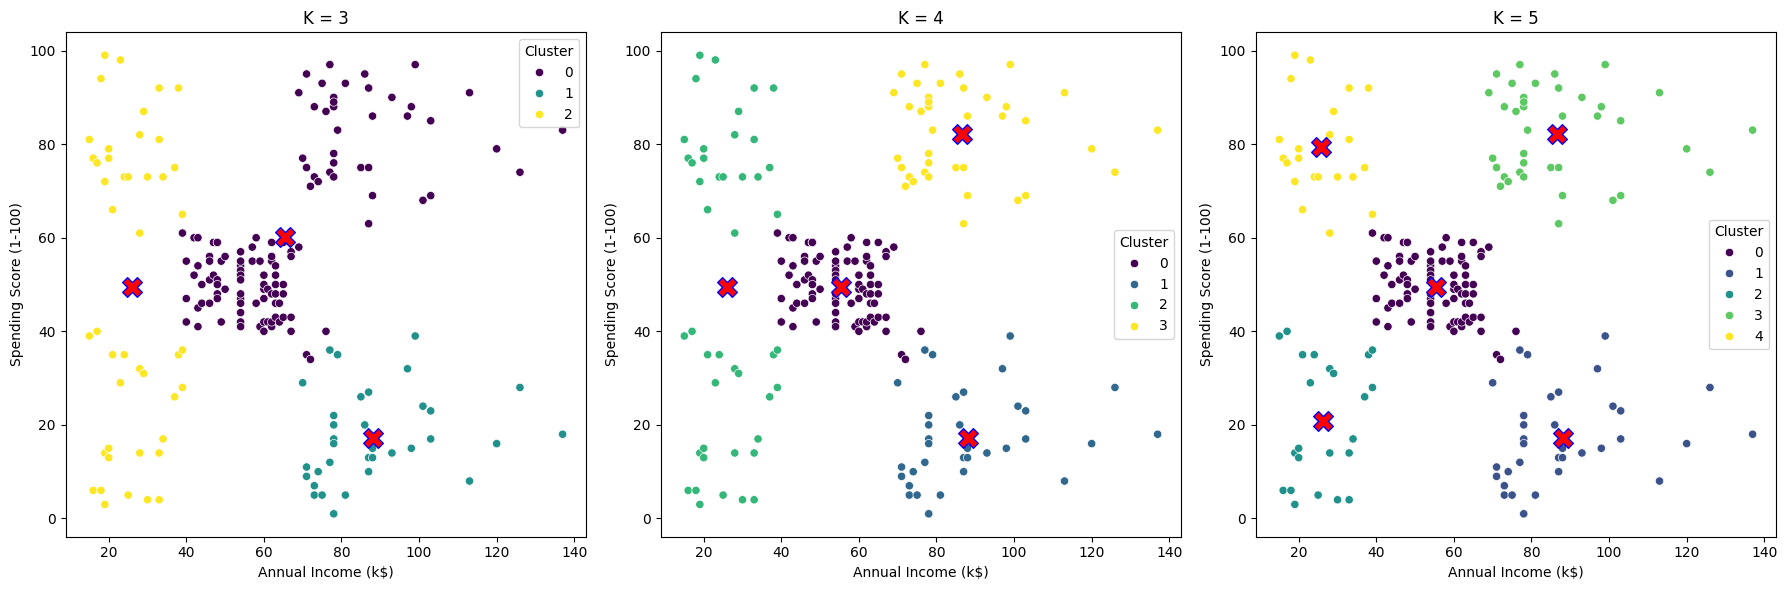

In [12]:
# Normalización de las variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Probar K-means con diferentes valores de K
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, k in enumerate([3, 4, 5]):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    selected_data['Cluster'] = kmeans.labels_

    # Visualización
    sns.scatterplot(
        x=selected_data['Annual Income (k$)'],
        y=selected_data['Spending Score (1-100)'],
        hue=selected_data['Cluster'],
        palette='viridis',
        ax=axes[i]
    )

    # Agregar los centroides al gráfico
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    axes[i].scatter(
        centroids[:, 0], centroids[:, 1],
        s=200, c='red', edgecolors='blue', marker='X', label='Centroides'
    )    
    
    axes[i].set_title(f"K = {k}")
    axes[i].set_xlabel('Annual Income (k$)')
    axes[i].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()


4. Elbow Method:
* Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.

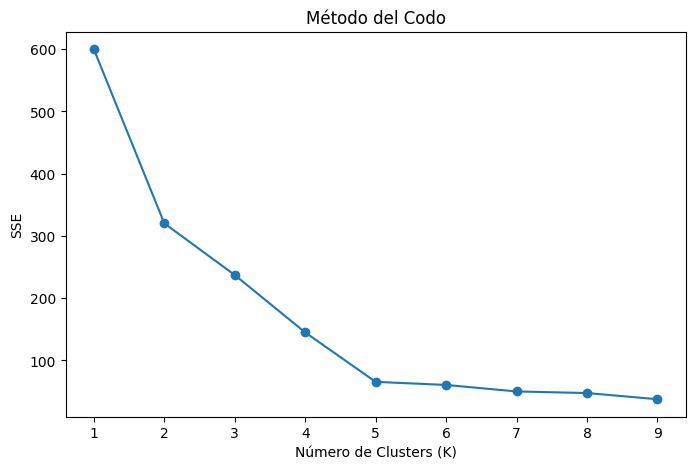

In [13]:
# Método del codo
sse = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('SSE')
plt.show()


5. Interpretación de Clusters:
* Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

In [14]:
# K óptimo (por ejemplo, suponemos que K = 4 del método del codo)
kmeans_opt = KMeans(n_clusters=4, random_state=42)
kmeans_opt.fit(scaled_data)
selected_data['Cluster'] = kmeans_opt.labels_

# Centroides
centroids = scaler.inverse_transform(kmeans_opt.cluster_centers_)
print("Centroides de los clusters:")
print(centroids)

# Análisis de las características de cada cluster
cluster_summary = selected_data.groupby('Cluster').mean()
print("Resumen de características por cluster:")
print(cluster_summary)


Centroides de los clusters:
[[ 5.52962963e+01  4.95185185e+01 -1.11022302e-15]
 [ 8.82000000e+01  1.71142857e+01  3.00000000e+00]
 [ 2.60222222e+01  4.94888889e+01  3.02222222e+00]
 [ 8.65384615e+01  8.21282051e+01  1.00000000e+00]]
Resumen de características por cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 88.200000               17.114286
2                 26.022222               49.488889
3                 86.538462               82.128205


6. Análisis de Resultados:
* Discute los resultados obtenidos. ¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?

## Análisis Final basado en los Resultados:
### Número Óptimo de Clusters (K=5):
El método del codo sugiere que 5 es el número óptimo de clusters. Esto indica que los clientes pueden agruparse en cinco categorías distintas basadas en sus ingresos anuales y su puntuación de gasto.

### Centroides de los Clusters:
Los centroides representan el centro geométrico de cada grupo. Interpretar estos valores ayuda a caracterizar los comportamientos promedio de los clientes en cada cluster:

* Cluster 0:
    * Ingreso Anual: 55.3k$
    * Puntuación de Gasto: 49.5
    * Este grupo tiene ingresos medios y una puntuación de gasto promedio. Podrían ser clientes de perfil equilibrado en términos de capacidad de gasto y disposición a gastar.
* Cluster 1:
    * Ingreso Anual: 88.2k$
    * Puntuación de Gasto: 17.1
    * Estos clientes tienen altos ingresos pero baja disposición a gastar. Podrían ser individuos conservadores o que prefieren ahorrar.
* Cluster 2:
    * Ingreso Anual: 26.0k$
    * Puntuación de Gasto: 49.5
    * Este grupo incluye clientes con ingresos bajos, pero con una disposición a gastar moderada. Podrían ser sensibles al precio, pero con un interés en productos específicos.
* Cluster 3:
    * Ingreso Anual: 86.5k$
    * Puntuación de Gasto: 82.1
    * Este grupo tiene altos ingresos y una alta disposición a gastar. Representan a los mejores clientes para estrategias de marketing premium o productos de lujo.

### Resumen de Características por Cluster:
Agrupar las características promedio de cada cluster proporciona información valiosa para diseñar estrategias personalizadas:

* Cluster 0: Público objetivo para productos de gama media, con campañas centradas en equilibrio calidad-precio.
* Cluster 1: Estrategias que resalten el valor y el retorno sobre la inversión podrían ser efectivas.
* Cluster 2: Promociones y descuentos serían útiles para atraer a este grupo.
* Cluster 3: Enfoque en exclusividad, personalización y experiencias premium para maximizar su interés.

### Conclusión General:
Este análisis de clustering resalta patrones claros entre los ingresos y el comportamiento de gasto de los clientes.

* El cluster 3 es ideal para productos y servicios de lujo.
* El cluster 1 podría requerir incentivos para gastar más.
* Los clusters 0 y 2 representan segmentos más sensibles al precio pero con diferencias en ingresos y disposición a gastar.

Este conocimiento puede ayudar a priorizar esfuerzos de marketing y diseño de productos para satisfacer las necesidades específicas de cada grupo.